# Part 2.6: Supervised Learning - Gradient Boosting Regressor

**Boosting** is another powerful ensemble technique. Unlike bagging (used in Random Forests), boosting builds models **sequentially**, where each new model attempts to correct the errors of the previous one.

**Gradient Boosting** is a specific implementation where each new model (typically a decision tree) is trained to predict the **residuals** (the errors) of the previous model. By adding these predictions together, the overall model improves over time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Use the same data as the previous examples
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Fit the model
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, learning_rate=0.1, random_state=42)
gbrt.fit(X, y)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,120
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


### Key Hyperparameters
- `n_estimators`: The number of trees to build. More trees can lead to overfitting if other parameters aren't tuned.
- `learning_rate`: Shrinks the contribution of each tree. A lower learning rate requires more estimators but can lead to better generalization.
- `max_depth`: The maximum depth of the individual trees, used to control their complexity.

### Visualizing Sequential Predictions
Let's see how the model's predictions improve as more trees are added.

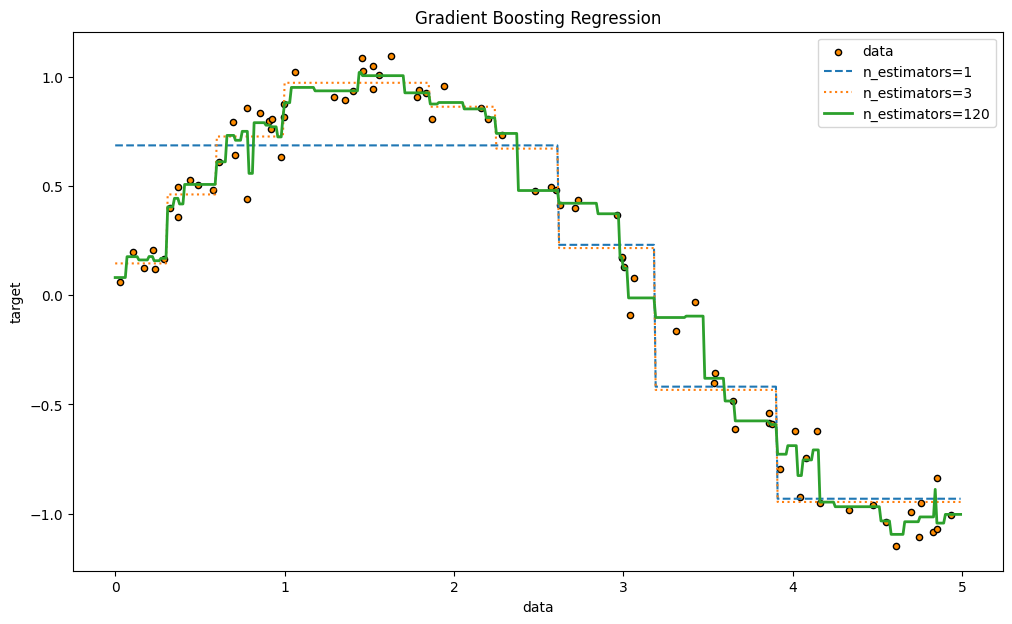

In [2]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

plt.figure(figsize=(12, 7))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")

# Predictions after 1, 3, and 120 trees
gbrt_1 = GradientBoostingRegressor(max_depth=2, n_estimators=1, learning_rate=1.0, random_state=42)
gbrt_1.fit(X, y)
plt.plot(X_test, gbrt_1.predict(X_test), label='n_estimators=1', linestyle='--')

gbrt_3 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt_3.fit(X, y)
plt.plot(X_test, gbrt_3.predict(X_test), label='n_estimators=3', linestyle=':')

plt.plot(X_test, gbrt.predict(X_test), label='n_estimators=120', linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()

### Popular Gradient Boosting Libraries
While Scikit-learn's `GradientBoostingRegressor` is great, more advanced and highly optimized libraries are dominant in practice and in competitions:
- **XGBoost**: The original high-performance gradient boosting library.
- **LightGBM**: A faster alternative from Microsoft that uses a different tree-growth strategy.
- **CatBoost**: A library from Yandex that excels at handling categorical features automatically.